🏆 Best model based on Test R²: LightGBM
✅ Best model loaded: LightGBM_tuned.joblib
🚀 Production model saved at: C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML\models\production_model.joblib


<Figure size 1000x600 with 0 Axes>

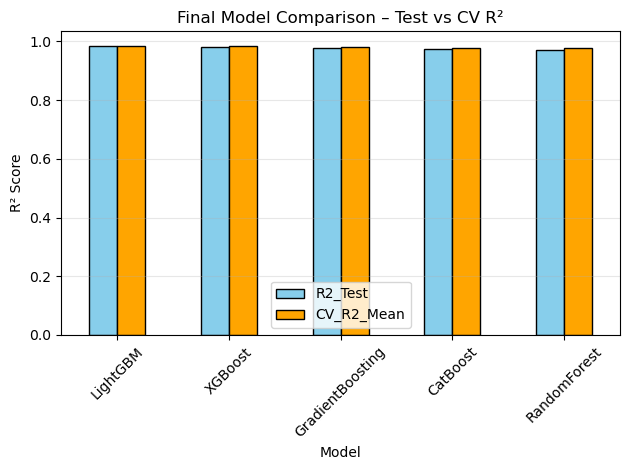

In [1]:
# Step10 - Deploy Best Model Automatically

import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Paths
# ---------------------------
PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML"
MODEL_PATH = os.path.join(PROJECT_ROOT, "models")
REPORT_PATH = os.path.join(PROJECT_ROOT, "reports")
os.makedirs(REPORT_PATH, exist_ok=True)

# ---------------------------
# Load benchmarking results (from Step9)
# ---------------------------
results_df = pd.read_csv(
    os.path.join(REPORT_PATH, "model_benchmarking_results_with_cv.csv"),
    index_col="Model"
)

# Identify best model automatically
best_model_name = results_df["R2_Test"].idxmax()
best_model_file = f"{best_model_name}_tuned.joblib"
print(f"🏆 Best model based on Test R²: {best_model_name}")

# ---------------------------
# Load best model
# ---------------------------
best_model = joblib.load(os.path.join(MODEL_PATH, best_model_file))
print("✅ Best model loaded:", best_model_file)

# ---------------------------
# Save as production model
# ---------------------------
production_model_path = os.path.join(MODEL_PATH, "production_model.joblib")
joblib.dump(best_model, production_model_path)
print("🚀 Production model saved at:", production_model_path)

# ---------------------------
# Final summary visualization (Test vs CV R² only)
# ---------------------------
plt.figure(figsize=(10, 6))
results_df[["R2_Test", "CV_R2_Mean"]].plot(
    kind="bar", edgecolor="black", color=["skyblue", "orange"]
)
plt.title("Final Model Comparison – Test vs CV R²")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(REPORT_PATH, "Final_R2_Report.png"))
plt.show()

# ---------------------------
# Prediction function with input validation
# ---------------------------
def predict_financial_loss(new_data: pd.DataFrame):
    """
    Predict financial loss (in Million $) for new cyber threat data.
    new_data must include the same features used in training.
    """
    required_features = [
        "Number of Affected Users",
        "Incident Resolution Time (in Hours)",
        "Attack Type",
        "Target Industry",
        "Attack Source",
        "Security Vulnerability Type",
        "AttackType_TargetIndustry",
        "Loss_per_User"
    ]
    missing = [f for f in required_features if f not in new_data.columns]
    if missing:
        raise ValueError(f"Missing required features: {missing}")
    return best_model.predict(new_data)

# ---------------------------
# Example usage
# ---------------------------
# new_sample = pd.DataFrame({
#     "Number of Affected Users": [5000],
#     "Incident Resolution Time (in Hours)": [72],
#     "Attack Type": ["Phishing"],
#     "Target Industry": ["Finance"],
#     "Attack Source": ["External"],
#     "Security Vulnerability Type": ["Human Error"],
#     "AttackType_TargetIndustry": ["Phishing_Finance"],
#     "Loss_per_User": [0.5]
# })
# print("Predicted Loss (Million $):", predict_financial_loss(new_sample)[0])